In [35]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# About the Dataset

This dataset contains the information and times for finishers of the Boston Marathon of 2014 Boston Marathon. 

The Boston Marathon is the oldest marathon run in the US as it is the only marathon (other than olympic trails) that most of the participants have to qualify to participate.

The Database is maintained by the Boston Athletic Association and can be located at their website. [Boston Athletic Association](https://baa.org)


## Content
The dataset contains the name, age, gender, country, city and state (w shere available), times at 9 different stages of the race, expected time, finish time and pace, overall place, gender place and division place.


# Challenge

The challenge is to use the tools learned in Unit 4 to determine which clustering solution, including number of clusters and algorithm used, is best for the marathon data. 

# Preparing the Dataset

In [36]:
df = pd.read_csv('results.txt', header=0)

In [37]:
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [38]:
df.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [39]:
data = df[['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'official', 'gender', 'age', 'pace',
          'half']]
data.gender[data.gender == 'F'] = 1 
data.gender[data.gender == 'M'] = 0

In [40]:
data['5k'] = pd.to_numeric(data['5k'], errors='coerce')
data['10k'] = pd.to_numeric(data['10k'], errors='coerce')
data['20k'] = pd.to_numeric(data['20k'], errors='coerce')
data['25k'] = pd.to_numeric(data['25k'], errors='coerce')
data['30k'] = pd.to_numeric(data['30k'], errors='coerce')
data['35k'] = pd.to_numeric(data['35k'], errors='coerce')
data['40k'] = pd.to_numeric(data['40k'], errors='coerce')
data['half'] = pd.to_numeric(data['half'], errors='coerce')
data['gender'] = pd.to_numeric(data['gender'], errors='coerce')


In [41]:
df = data
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31649 entries, 0 to 31983
Data columns (total 12 columns):
5k          31649 non-null float64
10k         31649 non-null float64
20k         31649 non-null float64
25k         31649 non-null float64
30k         31649 non-null float64
35k         31649 non-null float64
40k         31649 non-null float64
official    31649 non-null float64
gender      31649 non-null int64
age         31649 non-null int64
pace        31649 non-null float64
half        31649 non-null float64
dtypes: float64(10), int64(2)
memory usage: 3.1 MB


In [42]:
df.shape

(31649, 12)

# Plotting the Data

Because we have 12 columns, we are going to need to reduce the number of features to plot the data in a 2D plane. To do this we will use PCA to reduce the number of features to 2 features.

In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


# Make sure the number of rows divides evenly into four samples.

rows = df.shape[0] - df.shape[0] % 4
df = df.iloc[:rows, :]

X=df

# Normalize
X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

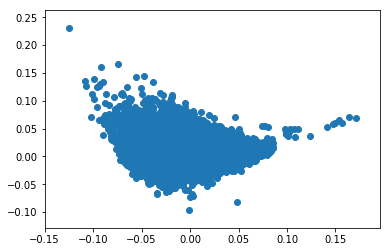

In [46]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

# Testing our Clustering Methods

After normalizing the data and using PCA to reduce the data and plotting the data, we can see from the plot that there are no clearly defined clusters. Let's try the four different clustering methods we learned in Unit 4 to see which yields the best results. 

# K-means

First, let's try using the K-means clustering algorithm. Let's see plot our data with 2, 3, and 4 clusters to see which one gives us a better result. We are also going to break up our data into 4 subsamples to look for consistency. 

In [47]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


# Make sure the number of rows divides evenly into four samples.

rows = df.shape[0] - df.shape[0] % 4
df = df.iloc[:rows, :]

X=df

# Normalize
X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)


# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X1, X_pca1),
    (X2, X_pca2),
    (X3, X_pca3),
    (X4, X_pca4)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=42).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

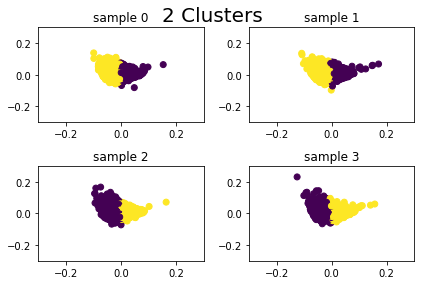

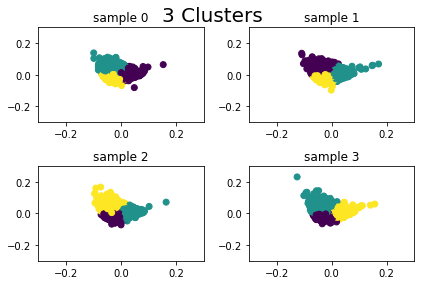

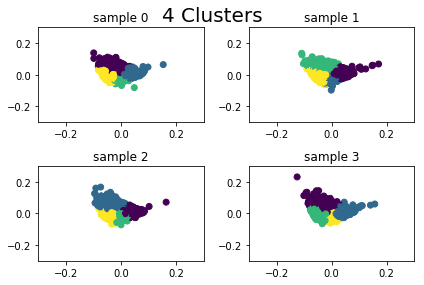

In [48]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(2, 2)
    
    # Make a plot for each sample.
    for i in range(4):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
        axarr[rows, cols].set_xlim([-.3, .3])
        axarr[rows, cols].set_ylim([-.3, .3])
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

In [49]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for sample in [X1, X2, X3, X4]:
    model = KMeans(n_clusters=2, random_state=42).fit(sample)
    labels = model.labels_
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

0.3714788607610234
0.37437326883155914
0.37406662178253325
0.37953630745231254


## Analysis 

Using K-means to break the data up into 4 sub samples with 2,3, and 4 clusters, we can see that each number of clusters is relatively uniform from subgroup to subgroup. Meaning we are getting consitant results. Furthermore, the Silhouette scores for each subgroup of the data are also consitent. 

However, each grouping of clusters looks pretty good so using this approach does not to be right fit for the data. My suspician is that there are probably more than 4 clusters in the data. 

# Mean Shift

Next we'll try the Mean-Shift Method.

In [53]:
X=df

# Normalize
X_norm = normalize(X)

# Data frame to store features and predicted cluster memberships.
ypred = pd.DataFrame()

# Create the two-feature PCA for graphing purposes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

In [54]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_pca, quantile=0.2, n_samples=5000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_pca)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 8


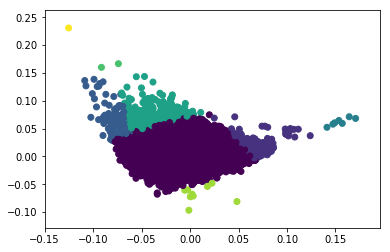

In [56]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

# Analysis

Using the MeanShift Alogorithm yieled 8 estimated Clusters.

# Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering

# We know we're looking for eight clusters.
n_clusters=8

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_pca)

#Predicted clusters.
predict=sc.fit_predict(X_pca)

#Graph results.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predict)
plt.show()



# Analysis

# Affinity Propogation

In [29]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_pca)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


NameError: name 'X_train' is not defined

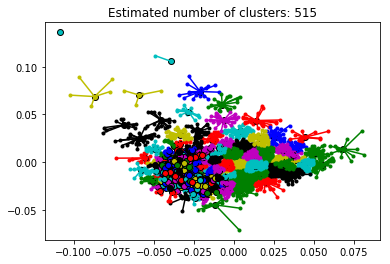

In [42]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_pca[cluster_centers_indices[k]]
    plt.plot(X_pca[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_pca[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# Analysis

# Finding K through the Elbow Method

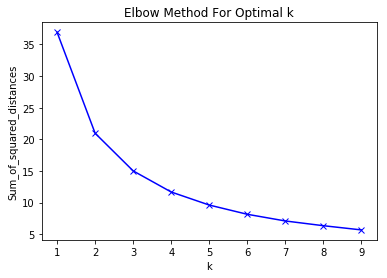

In [44]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_pca)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# Analysis

Looks liike 4 is where it elbows.

In [16]:
#NEW Might change
X = df

cluster_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X)
X_pred = X.copy()
X_pred['cluster_assignment'] = cluster_pred

cluster_dataframes = {}
for n_clust in range(4):
    cluster_dataframes[n_clust] = X_pred.loc[X_pred['cluster_assignment'] == n_clust]

for name, frame in cluster_dataframes.items():
    print(name)
    print('\n')
    print(frame.describe())

NameError: name 'X' is not defined

# Conclusion & Cluster Descriptions